In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "your_access_token"
access_token_secret = "your_access_secret_token"
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'honda'
    stream.filter(track=['honda','Honda','HONDA'])

### Then from your terminal, execute this script with output piped to a text file: your_script.py > tweets_data.txt

# Then run this script below to create a Python dataframe of the tweets data

In [149]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from os import path

d = path.dirname('/home/pybokeh/temp/')
text = open(path.join(d, 'twitter_data.txt')).read()

tweets_data = []
tweets_file = open(path.join(d, 'twitter_data.txt'),'r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

2386


In [78]:
tweets_data[2]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Mar 22 15:35:58 +0000 2015',
 'entities': {'hashtags': [],
  'symbols': [],
  'trends': [],
  'urls': [],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 579667845027614720,
 'id_str': '579667845027614720',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'text': "It's great getting the Honda discount from my grandpa for parts😁",
 'timestamp_ms': '1427038558619',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'Sun Jan 01 00:24:52 +0000 2012',
  'default_profile': False,
  'default_profile_image': False,
  'descriptio

In [150]:
tweets = pd.DataFrame()
tweets['text']      = [tweet['text'] for tweet in tweets_data]
tweets['lang']      = [tweet['lang'] for tweet in tweets_data]
tweets['retweeted'] = [tweet['retweeted'] for tweet in tweets_data]

In [143]:
tweets.head()

,text,lang,retweeted
0,"ถาดวางของท้ายรถ Honda HRV , CRV-G4 , Mobilio ,...",th,False
1,Honda Racing Championship Cimahi 2015 sukses d...,in,False
2,It's great getting the Honda discount from my ...,en,False
3,"RT @chacho_lml: Inolvidable no? Montecarlo, Mc...",es,False
4,RT @SonAutos: Honda HR-V 2016 ofrece un consum...,es,False


In [151]:
english_tweets = tweets[(tweets['lang']=='en') & (tweets['retweeted']==False)]
english_tweets.drop_duplicates(subset='text');

In [152]:
text = ''
for line in english_tweets['text']:
    text = text + ' ' + line

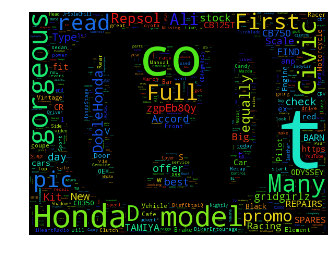

In [153]:
%matplotlib inline
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
#text = strWords
#text = open(path.join(d, 'alice.txt')).read()

additional_words = [
'rt',
'ebay'
]

for word in additional_words:
    STOPWORDS.add(word)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
honda_mask = imread(path.join(d, "honda_logo_mask.png"), flatten=True)
wc = WordCloud(background_color="black", max_words=2000, mask=honda_mask, stopwords=STOPWORDS)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "honda_word_cloud.png"))

# show
plt.imshow(wc)
plt.axis("off")
#plt.figure()
#plt.imshow(honda_mask, cmap=plt.cm.gray)
#plt.axis("off")
plt.show()

In [154]:
wc.process_text(text)[:50]

[('t', 1.0),
 ('co', 0.9941690962099126),
 ('Honda', 0.8520408163265306),
 ('gorgeous', 0.17055393586005832),
 ('model', 0.141399416909621),
 ('Civic', 0.12026239067055394),
 ('Many', 0.09037900874635568),
 ('First', 0.08965014577259475),
 ('Full', 0.08965014577259475),
 ('read', 0.08746355685131195),
 ('pic', 0.08600583090379009),
 ('D', 0.08600583090379009),
 ('promo', 0.08527696793002916),
 ('Ali', 0.08454810495626822),
 ('DobleHonda', 0.08454810495626822),
 ('equally', 0.08454810495626822),
 ('Repsol', 0.08454810495626822),
 ('gridgirlz', 0.08381924198250729),
 ('zgpEb8Qy', 0.08381924198250729),
 ('New', 0.07725947521865889),
 ('day', 0.06997084548104957),
 ('best', 0.06997084548104957),
 ('check', 0.06924198250728864),
 ('stock', 0.06778425655976676),
 ('Accord', 0.06486880466472303),
 ('Type', 0.06341107871720117),
 ('offer', 0.0619533527696793),
 ('Kit', 0.0597667638483965),
 ('Racing', 0.056851311953352766),
 ('CB750', 0.056851311953352766),
 ('Big', 0.053206997084548104),
 ('S

In [138]:
help(WordCloud)

Help on class WordCloud in module wordcloud.wordcloud:

class WordCloud(builtins.object)
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (default=200)
 |      Height of the canvas.
 |  
 |  ranks_only : boolean (default=False)
 |      Only use the rank of the words, not the actual counts.
 |  
 |  prefer_horizontal : float (default=0.90)
 |      The ratio of times to try horizontal fitting as opposed to vertical.
 |  
 |  mask : nd-array or None (default=None)
 |      If not None, gives a binary mask on where to draw words. All zero
 |      entries will be considered "free" to draw on, while all non-zero
 |      entries will be deemed oc

In [137]:
STOPWORDS

{'',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'eBay',
 'each',
 'ebay',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',